# Test

In [3]:
import torch
import matplotlib.pyplot as plt

In [4]:
path_Gs_G0 = '/home/jiahang/DiGress/chain_results/2024-05-01/16-00-27-protein-2/protein-2/test/Gs_G0.pkl'
path_Gs_Gt = '/home/jiahang/DiGress/chain_results/2024-05-01/16-00-27-protein-2/protein-2/test/Gs_Gt.pkl'
path_Gs_Gt_infer = '/home/jiahang/DiGress/chain_results/2024-05-01/16-00-27-protein-2_infer/protein-2_infer/infer/Gs_Gt.pkl'

In [5]:
import pickle
with open(path_Gs_G0, 'rb') as f:
    Gs_G0 = pickle.load(f)
with open(path_Gs_Gt, 'rb') as f:
    Gs_Gt = pickle.load(f)

In [6]:
with open(path_Gs_Gt_infer, 'rb') as f:
    Gs_Gt_infer = pickle.load(f)

In [7]:
def process_dist(dist):
    step_dist_list = []
    for step_idx in range(dist[0].shape[0]):
        _step_dist_list = []
        for batch in dist:
            _step_dist_list.append(batch[step_idx])
        _step_dist_list = torch.concat(_step_dist_list)
        step_dist_list.append(_step_dist_list)
    step_dist = torch.stack(step_dist_list)
    return step_dist.numpy()
Gs_G0_step_dist = process_dist(Gs_G0)
Gs_Gt_step_dist = process_dist(Gs_Gt)

In [8]:
Gs_Gt_infer_step_dist = process_dist(Gs_Gt_infer)

In [9]:
def draw_step_dist(step_dist, name, x_range=[0.1, 1]):
    fig, axs = plt.subplots(2, 5, sharey=True, tight_layout=True, figsize=(15, 5))
    fig.suptitle(f"{name}, from final to initial")
    nbins=30
    # We can set the number of bins with the *bins* keyword argument.
    for i in range(2):
        for j in range(5):
            axs[i][j].hist(step_dist[i*5 + j], bins=nbins)
            axs[i][j].set_xlim(x_range)

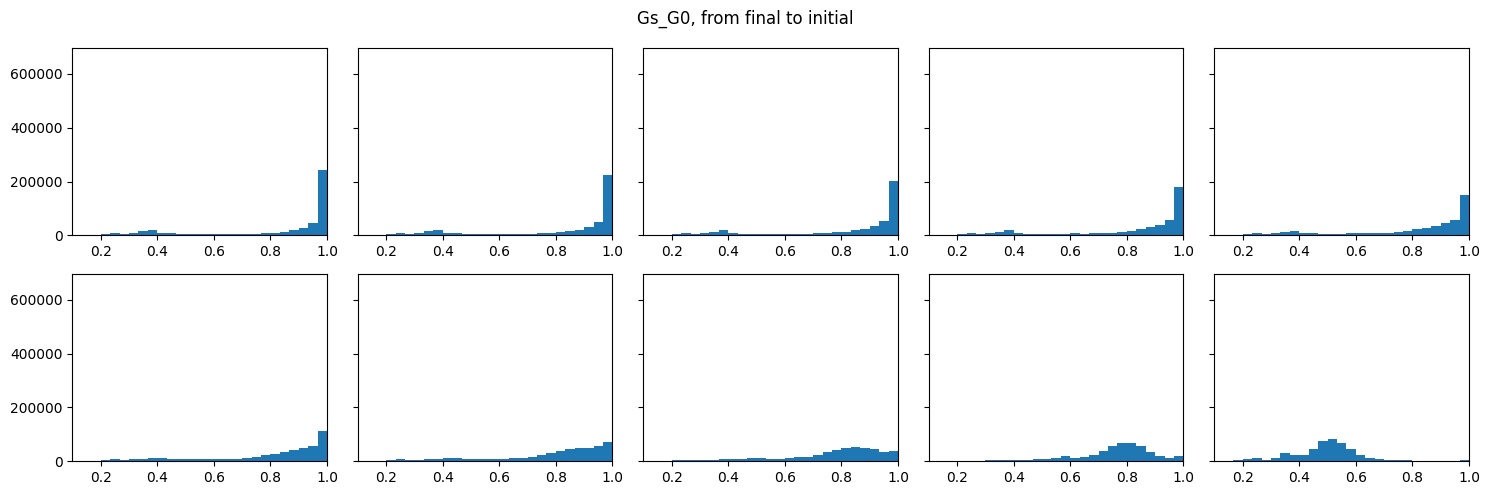

In [10]:
draw_step_dist(Gs_G0_step_dist, 'Gs_G0')

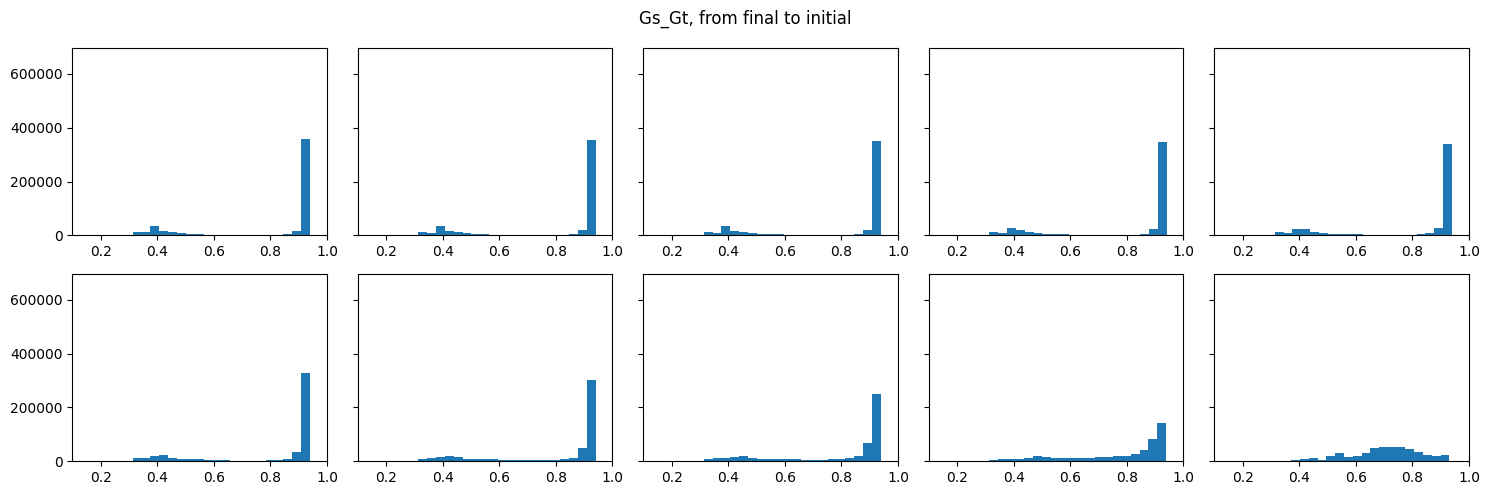

In [11]:
draw_step_dist(Gs_Gt_step_dist, 'Gs_Gt')

Text(0.5, 1.0, 'Gs_G0 vs Gs_Gt rec')

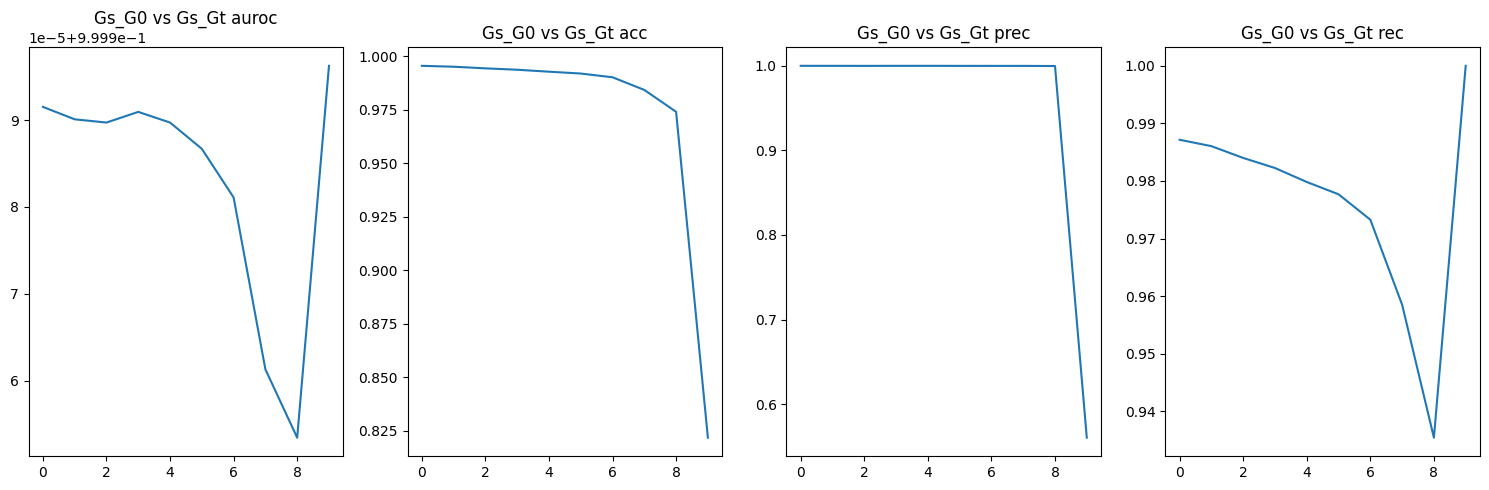

In [23]:
from sklearn.metrics import roc_auc_score, roc_curve
auroc_list = []
for i in range(10):
    auroc = roc_auc_score(Gs_G0_step_dist[i] > 0.5, Gs_Gt_step_dist[i])
    auroc_list.append(auroc)

from sklearn.metrics import accuracy_score
acc_list = []
for i in range(10):
    acc = accuracy_score(Gs_G0_step_dist[i] > 0.5, Gs_Gt_step_dist[i] > 0.5)
    acc_list.append(acc)

from sklearn.metrics import precision_score
prec_list = []
for i in range(10):
    prec = precision_score(Gs_G0_step_dist[i] > 0.5, Gs_Gt_step_dist[i] > 0.5)
    prec_list.append(prec)

from sklearn.metrics import recall_score
rec_list = []
for i in range(10):
    rec = recall_score(Gs_G0_step_dist[i] > 0.5, Gs_Gt_step_dist[i] > 0.5)
    rec_list.append(rec)

fig, axs = plt.subplots(1, 4, tight_layout=True, figsize=(15, 5))
axs[0].plot(auroc_list)
axs[0].set_title("Gs_G0 vs Gs_Gt auroc")
axs[1].plot(acc_list)
axs[1].set_title("Gs_G0 vs Gs_Gt acc")
axs[2].plot(prec_list)
axs[2].set_title("Gs_G0 vs Gs_Gt prec")
axs[3].plot(rec_list)
axs[3].set_title("Gs_G0 vs Gs_Gt rec")


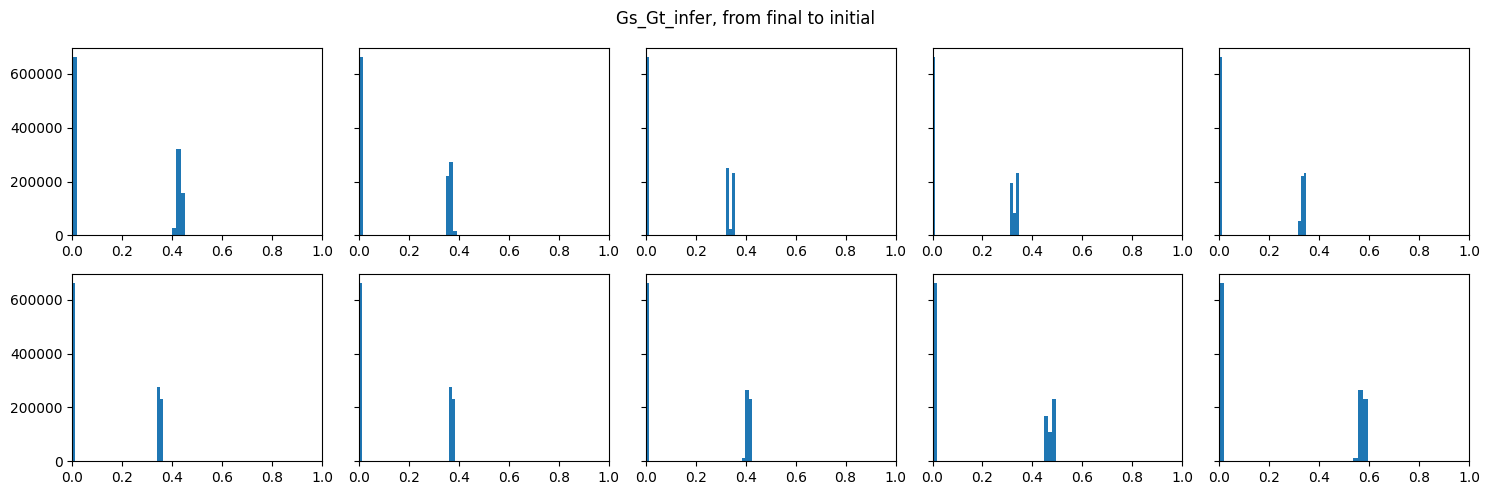

In [13]:
draw_step_dist(Gs_Gt_infer_step_dist, 'Gs_Gt_infer', x_range=[0, 1])